# Exploring errors obtained with different modelling approaches in segments of the data

## For public+private software

Abbreviations used throught these notebook:

 - ANN Arificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [2]:
# Some file paths
folder_with_results = 'model_compare'

ANN_res_path = folder_with_results+'/res_ANN.csv'

In [3]:
def plot_predict_vs_target(target,predicted,title):
    """Prints the actual versus predicted values"""
    plt.figure(figsize=(5, 5))
    plt.scatter(target,predicted, alpha=0.5)
    
    lims = [
    np.min([np.min(predicted), np.min(target)]),  # min of both axes
    np.max([np.max(predicted), np.max(target)]),  # max of both axes
    ]
    
    plt.plot(lims, lims, 'k-', alpha=0.50, zorder=0)
    #plt.xlim(lims)
    #plt.ylim(lims)
    
    plt.xlabel('Target')
    plt.ylabel('Predicted')
    plt.title(title)
    plt.grid()
    plt.show()

In [4]:
def add_to_summary(segment_summary,res,masks,loc_target,loc_res,feature_target,model):
    for idx,mask in enumerate(masks):
        segment     = idx+1
        #
        target_mean = np.mean(res[mask][feature_target])
        target_std  = np.std(res[mask][feature_target])
        #
        MAE = mae(res[mask].iloc[:,loc_target],res[mask].iloc[:,loc_res]) 
        MSE = mse(res[mask].iloc[:,loc_target],res[mask].iloc[:,loc_res])
        #
        q25 = res[mask][feature_target].quantile(0.25)
        q50 = res[mask][feature_target].quantile(0.50)
        q75 = res[mask][feature_target].quantile(0.75)
        #
        q25_mask = res[mask][feature_target] < q25
        q50_mask = (res[mask][feature_target] >= q25) & (res[mask][feature_target] < q50)
        q75_mask = res[mask][feature_target] < q75
        #
        res_25 = res[mask][q25_mask]
        res_50 = res[mask][q50_mask]
        res_75 = res[mask][q75_mask]
        #
        MAE_25 = mae(res_25.iloc[:,loc_target],res_25.iloc[:,loc_res])
        MAE_50 = mae(res_50.iloc[:,loc_target],res_50.iloc[:,loc_res])
        MAE_75 = mae(res_75.iloc[:,loc_target],res_75.iloc[:,loc_res]) 
        row = pd.Series([model,segment,target_mean,target_std,MAE,MSE,MAE_25,MAE_50,MAE_75],index=columns)
        segment_summary = segment_summary.append(row,ignore_index=True)
    return segment_summary   

### Segmenting ANN predictions
The Ordinary least-squares regresssions results will be inspected.

In [5]:
res_ANN = pd.read_csv(ANN_res_path)
res = res_ANN

Entire set of predictions:


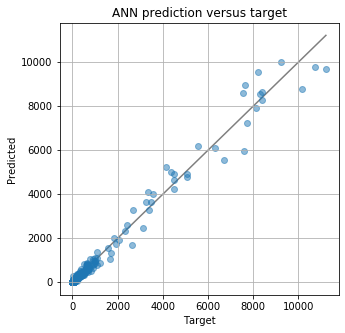

,IQ_TOTAL_REV_NEXT,FORECAST
count,2366.000000,2366.000000
mean,135.151960,138.143184
std,764.494055,759.864320
min,-8.227000,-10.231234
25%,2.664272,6.100016
50%,8.952487,10.896391
75%,31.233872,32.841721
max,11216.570000,10011.203000


In [6]:
print("Entire set of predictions:")

target_name = 'IQ_TOTAL_REV_NEXT'
forecast_name = 'FORECAST'

x1 = res[target_name]
x2 = res[forecast_name]
title ='ANN prediction versus target'
plot_predict_vs_target(x1,x2,title)


res[[target_name,forecast_name]].describe()

In [7]:
mask1 = res[target_name] < 5
mask2 = (res[target_name] >= 5 ) & (res[target_name] < 10 )
mask3 = (res[target_name] >= 10 ) & (res[target_name] < 50 )
mask4 = (res[target_name] >= 50)

### Segment 1:  Revenue  < 5 

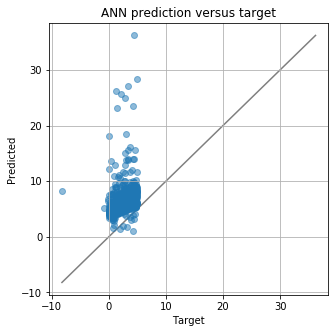

,IQ_TOTAL_REV_NEXT,FORECAST
count,870.000000,870.000000
mean,1.916593,6.082320
std,1.512779,2.815835
min,-8.227000,1.046950
25%,0.623582,4.572520
50%,1.649109,5.387129
75%,3.138212,6.737956
max,4.989381,36.203970


In [8]:
x1 = res[mask1][target_name]
x2 = res[mask1][forecast_name]
title ='ANN prediction versus target'
plot_predict_vs_target(x1,x2,title)

res[mask1][[target_name,forecast_name]].describe()

### Segment 2: 5 < Revenue  < 10

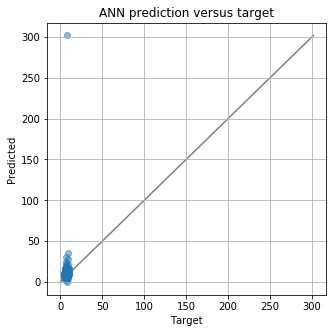

,IQ_TOTAL_REV_NEXT,FORECAST
count,370.000000,370.000000
mean,7.190076,10.572420
std,1.447118,15.594828
min,5.000631,-0.409975
25%,5.884029,7.724597
50%,7.106425,9.191923
75%,8.411931,10.953856
max,9.996645,301.874570


In [9]:
x1 = res[mask2][target_name]
x2 = res[mask2][forecast_name]
title ='ANN prediction versus target'
plot_predict_vs_target(x1,x2,title)

res[mask2][[target_name,forecast_name]].describe()


### Segment 3:  10 < Revenue  < 50

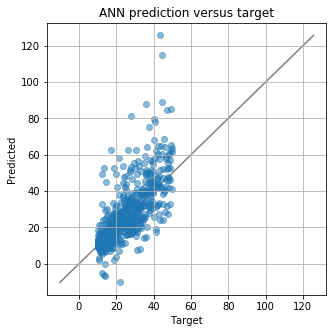

,IQ_TOTAL_REV_NEXT,FORECAST
count,702.000000,702.000000
mean,23.547736,25.598534
std,10.787753,16.096357
min,10.005709,-10.231234
25%,14.292565,14.051298
50%,21.159286,21.205618
75%,30.933267,32.667679
max,49.771190,125.706764


In [10]:
x1 = res[mask3][target_name]
x2 = res[mask3][forecast_name]
title ='ANN prediction versus target'
plot_predict_vs_target(x1,x2,title)

res[mask3][[target_name,forecast_name]].describe()

### Segment 4: Revenue  > 50

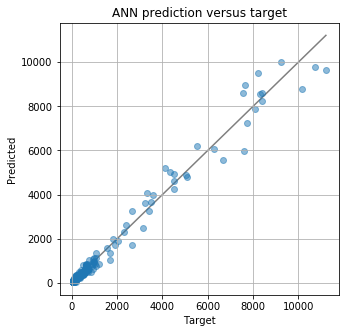

,IQ_TOTAL_REV_NEXT,FORECAST
count,424.000000,424.000000
mean,704.979392,706.776390
std,1694.255539,1682.951794
min,50.072266,19.027510
25%,76.067000,80.183914
50%,177.906320,192.364145
75%,475.664477,429.405190
max,11216.570000,10011.203000


In [11]:
x1 = res[mask4][target_name]
x2 = res[mask4][forecast_name]
title ='ANN prediction versus target'
plot_predict_vs_target(x1,x2,title)

res[mask4][[target_name,forecast_name]].describe()

In [12]:
res

,Unnamed: 0,company,year,quarter,IQ_PRIV,IQ_PUB,IQ_TOTAL_REV_NEXT,FORECAST
0,0,IQ1883585,2015.0,Q4,1,0,12.254941,13.635710
1,1,IQ108539514,2015.0,Q4,1,0,5.055035,5.571684
2,2,IQ916962,2004.0,Q4,1,0,1.462424,5.460890
3,3,IQ6234353,2013.0,Q4,0,1,5.658000,10.310270
4,4,IQ2422272,2009.0,Q4,0,1,0.102141,4.184340
5,5,IQ1361343,2008.0,Q1,1,0,35.010510,32.156290
6,6,IQ28071,2009.0,Q4,0,1,327.391630,289.791440
7,7,IQ9898268,2013.0,Q4,0,1,5.564661,7.204894
8,8,IQ243658312,2017.0,Q4,0,1,6.260910,4.980864
9,9,IQ212762,2010.0,Q4,0,1,12.087825,13.443144


In [13]:
columns = ['Model','Segment','Target_Mean','Target_Std','MAE','MSE','MAE_25','MAE_50','MAE_75']
segment_summary = pd.DataFrame(columns=columns)

In [14]:
res        = res
masks      = [mask1,mask2,mask3,mask4]
loc_target = 6
loc_res    = 7
model      = 'ANN'
columns    = ['Model','Segment','Target_Mean','Target_Std','MAE','MSE','MAE_25','MAE_50','MAE_75']
feature_target  = target_name
segment_summary = pd.DataFrame(columns=columns)


segment_summary = add_to_summary(segment_summary,res,masks,loc_target,loc_res,feature_target,model)

In [15]:
segment_summary

,Model,Segment,Target_Mean,Target_Std,MAE,MSE,MAE_25,MAE_50,MAE_75
0,ANN,1,1.916593,1.511910,4.185301,24.152611,4.498228,4.400377,4.333903
1,ANN,2,7.190076,1.445161,3.781776,251.625057,3.124587,2.990383,4.058301
2,ANN,3,23.547736,10.780066,6.575841,117.366124,3.327113,4.630532,5.100905
3,ANN,4,704.979392,1692.256416,90.350268,53039.550402,14.298011,23.545166,28.914543


IQ_TOTAL_REV for healthcare pricate data (for comparison):
count      745.000000
mean       102.703220
std        608.802864
min          0.836000
25%          9.365349
50%         18.654000
75%         36.879013
max      11216.570000

### Palomas models

In [16]:
# Some file paths
folder_with_results = 'model_compare'

res_path = folder_with_results+'/resPaloma.csv'

In [17]:
res = pd.read_csv(res_path)


Entire set of predictions:


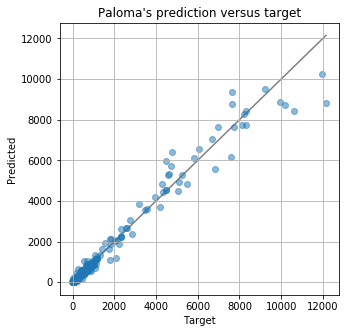

,TARGET,Predictions
count,3123.000000,3123.000000
mean,144.266497,143.743794
std,773.635492,749.973765
min,-8.601155,0.002325
25%,2.497497,2.752552
50%,8.966805,9.665545
75%,30.742387,31.513939
max,12153.609000,10254.166000


In [18]:
print("Entire set of predictions:")

target_name = 'TARGET'
forecast_name = 'Predictions'

x1 = res[target_name]
x2 = res[forecast_name]
title ='Paloma\'s prediction versus target'
plot_predict_vs_target(x1,x2,title)


res[[target_name,forecast_name]].describe()

In [19]:
mask1 = res[target_name] < 5
mask2 = (res[target_name] >= 5 ) & (res[target_name] < 10 )
mask3 = (res[target_name] >= 10 ) & (res[target_name] < 50 )
mask4 = (res[target_name] >= 50)

### Segment 1:  Revenue  < 5 

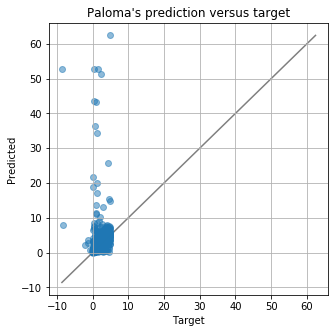

,TARGET,Predictions
count,1147.000000,1147.000000
mean,1.813436,2.767592
std,1.516836,4.691551
min,-8.601155,0.002325
25%,0.578561,0.794787
50%,1.504000,1.780473
75%,2.880262,3.554333
max,4.993000,62.446340


In [20]:
x1 = res[mask1][target_name]
x2 = res[mask1][forecast_name]
plot_predict_vs_target(x1,x2,title)

res[mask1][[target_name,forecast_name]].describe()

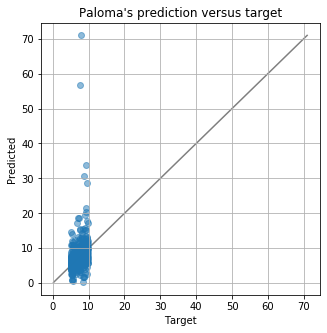

,TARGET,Predictions
count,485.000000,485.000000
mean,7.241997,7.953153
std,1.428085,5.046053
min,5.000631,0.239098
25%,5.944025,5.765122
50%,7.211514,7.111897
75%,8.452819,9.235957
max,9.989875,70.919794


In [21]:
x1 = res[mask2][target_name]
x2 = res[mask2][forecast_name]

plot_predict_vs_target(x1,x2,title)

res[mask2][[target_name,forecast_name]].describe()

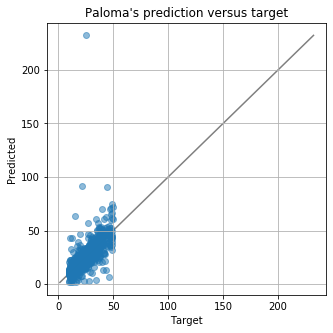

,TARGET,Predictions
count,913.000000,913.000000
mean,23.195717,23.727462
std,10.284727,14.327532
min,10.000873,1.643382
25%,14.708601,14.129680
50%,20.896580,20.839992
75%,29.410364,29.343825
max,49.675022,232.176120


In [22]:
x1 = res[mask3][target_name]
x2 = res[mask3][forecast_name]
plot_predict_vs_target(x1,x2,title)

res[mask3][[target_name,forecast_name]].describe()

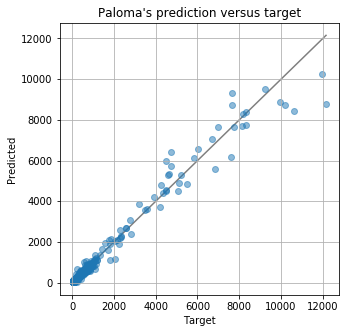

,TARGET,Predictions
count,578.000000,578.000000
mean,733.173361,727.019011
std,1676.751020,1619.982702
min,50.030476,11.050237
25%,82.997948,81.623107
50%,202.999035,205.080451
75%,544.457427,554.103087
max,12153.609000,10254.166000


In [23]:
x1 = res[mask4][target_name]
x2 = res[mask4][forecast_name]
plot_predict_vs_target(x1,x2,title)

res[mask4][[target_name,forecast_name]].describe()

In [24]:
res        = res
masks      = [mask1,mask2,mask3,mask4]
loc_target = 1
loc_res    = 2
model      = 'Paloma\'s'
columns    = ['Model','Segment','Target_Mean','Target_Std','MAE','MSE','MAE_25','MAE_50','MAE_75']
feature_target  = target_name

segment_summary = add_to_summary(segment_summary,res,masks,loc_target,loc_res,feature_target,model)

In [25]:
segment_summary

,Model,Segment,Target_Mean,Target_Std,MAE,MSE,MAE_25,MAE_50,MAE_75
0,ANN,1,1.916593,1.511910,4.185301,24.152611,4.498228,4.400377,4.333903
1,ANN,2,7.190076,1.445161,3.781776,251.625057,3.124587,2.990383,4.058301
2,ANN,3,23.547736,10.780066,6.575841,117.366124,3.327113,4.630532,5.100905
3,ANN,4,704.979392,1692.256416,90.350268,53039.550402,14.298011,23.545166,28.914543
4,Paloma's,1,1.813436,1.516175,1.285112,22.359350,1.249732,1.269821,1.245717
5,Paloma's,2,7.241997,1.426612,2.213407,23.577527,1.671108,1.454688,1.968835
6,Paloma's,3,23.195717,10.279093,4.843484,102.159715,2.968758,3.724683,3.987969
7,Paloma's,4,733.173361,1675.299916,89.577921,77113.146960,10.258419,21.668050,25.466940
